In [9]:
import pandas as pd

data = pd.read_csv("/home/leong/Desktop/Air Traffic/Air_Traffic_Passenger_Statistics.csv")
data

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023/12/20 02:00:25 PM,2023/12/20 04:47:16 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023/12/20 02:00:25 PM,2023/12/20 04:47:16 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023/12/20 02:00:25 PM,2023/12/20 04:47:16 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2023/12/20 02:00:25 PM,2023/12/20 04:47:16 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2023/12/20 02:00:25 PM,2023/12/20 04:47:16 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35025,202310,2023/10/01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,14863,2023/12/20 02:00:27 PM,2023/12/20 04:47:16 PM
35026,202310,2023/10/01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,11221,2023/12/20 02:00:27 PM,2023/12/20 04:47:16 PM
35027,202310,2023/10/01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11133,2023/12/20 02:00:27 PM,2023/12/20 04:47:16 PM
35028,202310,2023/10/01,ZIPAIR Tokyo Inc,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Deplaned,Other,International,A,4732,2023/12/20 02:00:27 PM,2023/12/20 04:47:16 PM


In [10]:
data.isnull().sum()

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64

In [11]:
data.dropna(inplace= True)

In [14]:
data.describe()

,Activity Period,Passenger Count
count,34714.000000,34714.000000
mean,201172.677508,28240.497695
std,702.139961,63011.306219
min,199907.000000,0.000000
25%,200603.000000,4567.250000
50%,201206.000000,8721.000000
75%,201804.000000,20077.000000
max,202310.000000,856501.000000


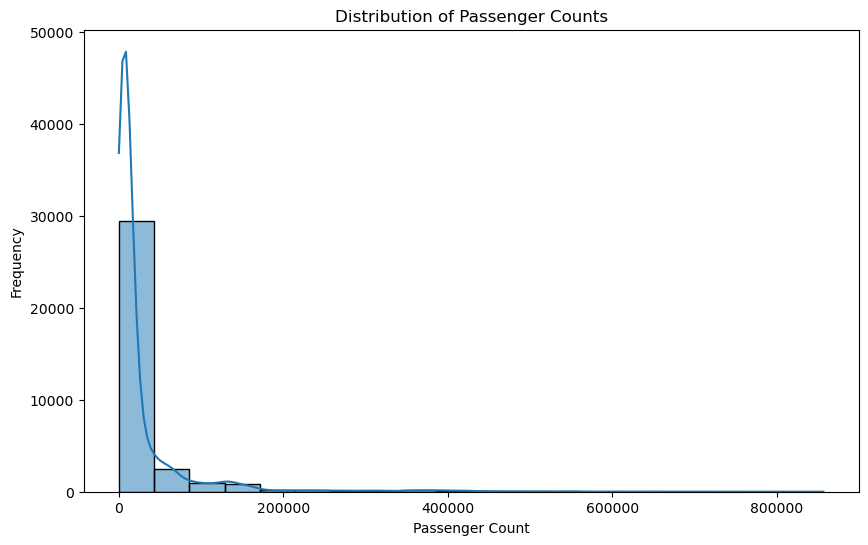

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of passenger counts
plt.figure(figsize=(10, 6))
sns.histplot(data['Passenger Count'], bins=20, kde=True)
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

Groupings

In [16]:
#total passenger count for each airline
airline_passenger_counts = data.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False)
print(airline_passenger_counts)

Operating Airline
United Airlines                     204175140
United Airlines - Pre 07/01/2013    199620536
American Airlines                    75289134
SkyWest Airlines                     72955183
Delta Air Lines                      62283500
                                      ...    
Xtra Airways                              146
Ameriflight                               110
Atlas Air, Inc                             68
Casino Express                             63
Evergreen International Airlines            4
Name: Passenger Count, Length: 117, dtype: int64


In [27]:
# Group data by 'Operating Airline' and calculate the sum of 'Passenger Count' for each airline
airline_flights = data.groupby('Operating Airline')['Passenger Count'].sum()

airline_highest_flights = airline_flights.idxmax()
highest_flights_count = airline_flights.max()

print(f"Airline with highest flights is '{airline_highest_flights}' with a total of {highest_flights_count} flights.")

Airline with highest flights is 'United Airlines' with a total of 204175140 flights.


In [23]:
# Total passenger count per GEO Region
region_passenger_counts = data.groupby('GEO Region')['Passenger Count'].sum().sort_values(ascending=False)
print(region_passenger_counts)

GEO Region
US                     753399618
Asia                    93514952
Europe                  63161620
Canada                  30573750
Mexico                  19744400
Australia / Oceania     10459829
Middle East              5271749
Central America          3963897
South America             250822
Name: Passenger Count, dtype: int64


In [24]:
# Total passenger count per terminal and boarding area
terminal_boarding_passenger_counts = data.groupby(['Terminal', 'Boarding Area'])['Passenger Count'].sum().sort_values(ascending=False)
print(terminal_boarding_passenger_counts)

Terminal       Boarding Area
Terminal 3     F                309308279
International  G                127863358
Terminal 1     B                125646435
International  A                116503908
Terminal 3     E                104350318
Terminal 2     D                 94732531
Terminal 1     C                 93432244
               A                  8503382
Other          Other                  182
Name: Passenger Count, dtype: int64


In [25]:
import plotly.express as px

# Assuming 'data' is your DataFrame
fig = px.line(data, x='Activity Period Start Date', y='Passenger Count', title='Passenger Counts Over Time',
              labels={'Passenger Count': 'Passenger Count', 'Activity Period Start Date': 'Activity Period Start Date'},
              hover_name='Passenger Count')

fig.update_layout(
    xaxis=dict(title='Activity Period Start Date'),
    yaxis=dict(title='Passenger Count'),
    hovermode='closest'
)

fig.show()


In [29]:
# Activity Period Analysis
activity_period_start_date_counts = data['Activity Period Start Date'].value_counts()

print("\nActivity Period Analysis:")
print("Activity Period Start Date Counts:")
print(activity_period_start_date_counts.head())


Activity Period Analysis:
Activity Period Start Date Counts:
2018/06/01    170
2018/05/01    165
2019/06/01    163
2018/07/01    162
2019/07/01    161
Name: Activity Period Start Date, dtype: int64
